In [83]:
import json
import os
import requests
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.json import json_normalize
from tqdm import tqdm_notebook as tqdm

%matplotlib inline

In [55]:
data_root = '../../data/loc-newspaper/'
images_root = f'{data_root}/images/'

In [56]:
## Create data directories

if not os.path.exists(data_root):
    os.makedirs(data_root)
    
if not os.path.exists(images_root):
    os.makedirs(images_root)

## Image metadata

In [57]:
## Download image metadata

mdata_path = f'{data_root}img_metadata.json'
url = 'http://beyondwords.labs.loc.gov/data'

if not os.path.exists(mdata_path):
    r = requests.get(url, stream=True)
    with open(mdata_path, 'wb') as f:
        for chunk in r.iter_content(): 
            if chunk:
                f.write(chunk)

In [58]:
## Load image metadata
with open(mdata_path, encoding='utf-8') as jsonfile:
    mdata = json.load(jsonfile)['data']

In [59]:
# Show a couple of data entries
mdata[:2]

[{'id': '5bbe445cd6342b000100406e',
  'location': {'standard': 'http://s3.amazonaws.com/ndnp-jpeg-surrogates/uuml_indurain_ver01/data/sn85058396/print/1917061101/0878.jpg'},
  'region': {'toolName': 'rectangleTool',
   'color': '#fe0000',
   'x': 2868.58841335232,
   'y': 273.5541060131441,
   'width': 901.9892066583056,
   'height': 2461.9869541182975,
   'label': 'Illustration/Photo'},
  'width': 6824,
  'height': 9404,
  'meta_data': {'set_key': 'http://chroniclingamerica.loc.gov/lccn/sn85058396/1917-06-11/ed-1/seq-7/',
   'subject_url': 'http://chroniclingamerica.loc.gov/lccn/sn85058396/1917-06-11/ed-1/seq-7/',
   'subject_description': 'The Ogden standard. June 11, 1917. Page 7',
   'resize': '1.000000',
   'alto': 'http://s3.amazonaws.com/ndnp-batches/uuml_indurain_ver01/data/sn85058396/print/1917061101/0878.xml'},
  'data': {'caption': 'Newest Brigadier General Has a New Uniform, Now Taboo\nBrig. Gen. R. E. L. Michie.\nBrig. Gen. R. E. L. Michie who has just been raised to his p

In [60]:
## Flatten metadata into dataframe
df = json_normalize(mdata, sep='_')
print(df.count())
df.head(10)

data_caption                     1292
data_category                    1285
data_creator                      466
data_task_prompt                  765
data_values                       765
height                           2064
id                               2064
location_standard                2064
meta_data_alto                   2064
meta_data_resize                 2064
meta_data_set_key                2064
meta_data_subject_description    2064
meta_data_subject_url            2064
region_color                     2064
region_height                    2064
region_label                     2064
region_toolName                  2064
region_width                     2064
region_x                         2064
region_y                         2064
width                            2064
dtype: int64


,data_caption,data_category,data_creator,data_task_prompt,data_values,height,id,location_standard,meta_data_alto,meta_data_resize,...,meta_data_subject_description,meta_data_subject_url,region_color,region_height,region_label,region_toolName,region_width,region_x,region_y,width
0,"Newest Brigadier General Has a New Uniform, No...",Photograph,NaN,NaN,NaN,9404,5bbe445cd6342b000100406e,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_indu...,1.000000,...,"The Ogden standard. June 11, 1917. Page 7",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,2461.986954,Illustration/Photo,rectangleTool,901.989207,2868.588413,273.554106,6824
1,MIDSUMMER FANCIE\nWhy should we speculate abou...,Illustration,UNDERWOOD & UNDERWOOD,NaN,NaN,9232,5bbf8a86536f12000100240e,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_indu...,1.000000,...,"The Ogden standard. August 28, 1918. Page 10",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,3411.532808,Illustration/Photo,rectangleTool,3580.003598,2084.807670,1368.824892,6544
2,THE DAYS OF REAL SPORT\nPST! Don't ferget ME- ...,Comics/Cartoon,Briggy,NaN,NaN,6341,5bbf8a5bf5a52900010023d0,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,...,"Evening public ledger. February 25, 1918. Page 8",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,1846.914074,Illustration/Photo,rectangleTool,2426.768448,1395.499210,390.858560,5064
3,"Modern Etiquette\n--California Pelican\n""Are y...",Comics/Cartoon,California Pelican,NaN,NaN,6328,5b21bd36d6342b00010018aa,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,...,"Evening public ledger. March 07, 1918. Page 16",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,840.142208,Illustration/Photo,rectangleTool,614.172949,133.256250,2778.263371,4980
4,THE OUTBURST OF EVERETT TRUE\nTake another let...,Comics/Cartoon,NaN,NaN,NaN,9012,5bb38a85536f120001002212,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_indu...,1.000000,...,"The Ogden standard. September 26, 1918. Page 11",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,2683.344526,Illustration/Photo,rectangleTool,1719.354721,3726.458169,467.606955,6640
5,MISS MIRIAM CLARK KANE\nPhiladelphia girl who ...,Photograph,NaN,NaN,NaN,6321,5ba2d048536f120001001e28,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,...,"Evening public ledger. March 12, 1918. Page 6",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,1808.561483,Illustration/Photo,rectangleTool,566.537384,3234.882477,577.432281,5028
6,SERVICE BELT IS THE NEWEST THING\nA service be...,Photograph,Underwood,NaN,NaN,9336,5bbe4480d6342b0001004070,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_juli...,1.000000,...,"The Ogden standard. January 15, 1918. Page 5",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,2554.561999,Illustration/Photo,rectangleTool,871.039807,2920.521277,834.441455,6756
7,Everyday etiquette,Illustration,NaN,NaN,NaN,9419,5bbe44256dc35800010023ad,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_indu...,1.000000,...,"The Ogden standard. July 05, 1917. Page 5",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,1113.524126,Illustration/Photo,rectangleTool,947.822736,2167.398844,417.571547,6880
8,RED CROSS WORKERS ENTERTAIN PHILADELPHIA'S ROL...,Photograph,NaN,NaN,NaN,6464,5bbe441bf5a5290001002308,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,...,"Evening public ledger. January 24, 1918. Page 16",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,2128.015089,Illustration/Photo,rectangleTool,3053.237925,2090.080157,434.855257,5172
9,PRIVATE JOHN

In [61]:
## Some attributes are one level deeper than others (under "values" attribute) and aren't then properly flattened
## Move them up to the same level as the others and re-normalize

for i, item in enumerate(mdata):
    values = item['data'].get('values')
    if values:
        mdata[i]['data'] = values[0]

df = json_normalize(mdata, sep='_')
print(df.count())
df.head(10)

data_caption                     2047
data_category                    2049
data_creator                      580
height                           2064
id                               2064
location_standard                2064
meta_data_alto                   2064
meta_data_resize                 2064
meta_data_set_key                2064
meta_data_subject_description    2064
meta_data_subject_url            2064
region_color                     2064
region_height                    2064
region_label                     2064
region_toolName                  2064
region_width                     2064
region_x                         2064
region_y                         2064
width                            2064
dtype: int64


,data_caption,data_category,data_creator,height,id,location_standard,meta_data_alto,meta_data_resize,meta_data_set_key,meta_data_subject_description,meta_data_subject_url,region_color,region_height,region_label,region_toolName,region_width,region_x,region_y,width
0,"Newest Brigadier General Has a New Uniform, No...",Photograph,NaN,9404,5bbe445cd6342b000100406e,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_indu...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn85058...,"The Ogden standard. June 11, 1917. Page 7",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,2461.986954,Illustration/Photo,rectangleTool,901.989207,2868.588413,273.554106,6824
1,MIDSUMMER FANCIE\nWhy should we speculate abou...,Illustration,UNDERWOOD & UNDERWOOD,9232,5bbf8a86536f12000100240e,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_indu...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn85058...,"The Ogden standard. August 28, 1918. Page 10",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,3411.532808,Illustration/Photo,rectangleTool,3580.003598,2084.807670,1368.824892,6544
2,THE DAYS OF REAL SPORT\nPST! Don't ferget ME- ...,Comics/Cartoon,Briggy,6341,5bbf8a5bf5a52900010023d0,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn83045...,"Evening public ledger. February 25, 1918. Page 8",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,1846.914074,Illustration/Photo,rectangleTool,2426.768448,1395.499210,390.858560,5064
3,"Modern Etiquette\n--California Pelican\n""Are y...",Comics/Cartoon,California Pelican,6328,5b21bd36d6342b00010018aa,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn83045...,"Evening public ledger. March 07, 1918. Page 16",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,840.142208,Illustration/Photo,rectangleTool,614.172949,133.256250,2778.263371,4980
4,THE OUTBURST OF EVERETT TRUE\nTake another let...,Comics/Cartoon,NaN,9012,5bb38a85536f120001002212,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_indu...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn85058...,"The Ogden standard. September 26, 1918. Page 11",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,2683.344526,Illustration/Photo,rectangleTool,1719.354721,3726.458169,467.606955,6640
5,MISS MIRIAM CLARK KANE\nPhiladelphia girl who ...,Photograph,NaN,6321,5ba2d048536f120001001e28,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn83045...,"Evening public ledger. March 12, 1918. Page 6",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,1808.561483,Illustration/Photo,rectangleTool,566.537384,3234.882477,577.432281,5028
6,SERVICE BELT IS THE NEWEST THING\nA service be...,Photograph,Underwood,9336,5bbe4480d6342b0001004070,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_juli...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn85058...,"The Ogden standard. January 15, 1918. Page 5",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,2554.561999,Illustration/Photo,rectangleTool,871.039807,2920.521277,834.441455,6756
7,Everyday etiquette,Illustration,NaN,9419,5bbe44256dc35800010023ad,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_indu...,1.000000,http://chroniclingamerica.loc.gov/lccn/sn85058...,"The Ogden standard. July 05, 1917. Page 5",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,1113.524126,Illustration/Photo,rectangleTool,947.822736,2167.398844,417.571547,6880
8,RED CROSS WORKERS ENTERTAIN PHILADELPHIA'S ROL...,Photograph,NaN,6464,5bbe441bf5a5290001002308,http://s3.amazonaws.com/ndnp-jpeg-surrog

In [62]:
## Show data types inferred by pandas

df.dtypes

data_caption                      object
data_category                     object
data_creator                      object
height                             int64
id                                object
location_standard                 object
meta_data_alto                    object
meta_data_resize                  object
meta_data_set_key                 object
meta_data_subject_description     object
meta_data_subject_url             object
region_color                      object
region_height                    float64
region_label                      object
region_toolName                   object
region_width                     float64
region_x                         float64
region_y                         float64
width                              int64
dtype: object

In [63]:
## Create an image ID by hashing the image url

import hashlib

# func to return md5 hash from a string
def hashstr(s):
    return hashlib.md5(s.encode('utf8')).hexdigest()

# apply to new column
df['img_url_hash'] = df.apply(lambda r: hashstr(r['location_standard']), axis=1)

In [64]:
## Save data as a csv
csvdata_root = f'{data_root}img_mdata.csv'
df.to_csv(csvdata_root, index=False, encoding='utf-8')

In [65]:
# Re-read data from sql and show counts
df = pd.read_csv(csvdata_root, encoding='utf-8')
print(df.count())
df.head()

data_caption                     2027
data_category                    2049
data_creator                      538
height                           2064
id                               2064
location_standard                2064
meta_data_alto                   2064
meta_data_resize                 2064
meta_data_set_key                2064
meta_data_subject_description    2064
meta_data_subject_url            2064
region_color                     2064
region_height                    2064
region_label                     2064
region_toolName                  2064
region_width                     2064
region_x                         2064
region_y                         2064
width                            2064
img_url_hash                     2064
dtype: int64


,data_caption,data_category,data_creator,height,id,location_standard,meta_data_alto,meta_data_resize,meta_data_set_key,meta_data_subject_description,meta_data_subject_url,region_color,region_height,region_label,region_toolName,region_width,region_x,region_y,width,img_url_hash
0,"Newest Brigadier General Has a New Uniform, No...",Photograph,NaN,9404,5bbe445cd6342b000100406e,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_indu...,1.0,http://chroniclingamerica.loc.gov/lccn/sn85058...,"The Ogden standard. June 11, 1917. Page 7",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,2461.986954,Illustration/Photo,rectangleTool,901.989207,2868.588413,273.554106,6824,c09f030c53e8efc3b7bd9f039b431a23
1,MIDSUMMER FANCIE\nWhy should we speculate abou...,Illustration,UNDERWOOD & UNDERWOOD,9232,5bbf8a86536f12000100240e,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_indu...,1.0,http://chroniclingamerica.loc.gov/lccn/sn85058...,"The Ogden standard. August 28, 1918. Page 10",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,3411.532808,Illustration/Photo,rectangleTool,3580.003598,2084.807670,1368.824892,6544,e93b45968ccd92b474eb386a6b107c66
2,THE DAYS OF REAL SPORT\nPST! Don't ferget ME- ...,Comics/Cartoon,Briggy,6341,5bbf8a5bf5a52900010023d0,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.0,http://chroniclingamerica.loc.gov/lccn/sn83045...,"Evening public ledger. February 25, 1918. Page 8",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,1846.914074,Illustration/Photo,rectangleTool,2426.768448,1395.499210,390.858560,5064,66f6be91512ef9473c0fa07a91d7a2e2
3,"Modern Etiquette\n--California Pelican\n""Are y...",Comics/Cartoon,California Pelican,6328,5b21bd36d6342b00010018aa,http://s3.amazonaws.com/ndnp-jpeg-surrogates/p...,http://s3.amazonaws.com/ndnp-batches/pst_davey...,1.0,http://chroniclingamerica.loc.gov/lccn/sn83045...,"Evening public ledger. March 07, 1918. Page 16",http://chroniclingamerica.loc.gov/lccn/sn83045...,#fe0000,840.142208,Illustration/Photo,rectangleTool,614.172949,133.256250,2778.263371,4980,d550a57d18d79af14c3b572d7aabdbcd
4,THE OUTBURST OF EVERETT TRUE\nTake another let...,Comics/Cartoon,NaN,9012,5bb38a85536f120001002212,http://s3.amazonaws.com/ndnp-jpeg-surrogates/u...,http://s3.amazonaws.com/ndnp-batches/uuml_indu...,1.0,http://chroniclingamerica.loc.gov/lccn/sn85058...,"The Ogden standard. September 26, 1918. Page 11",http://chroniclingamerica.loc.gov/lccn/sn85058...,#fe0000,2683.344526,Illustration/Photo,rectangleTool,1719.354721,3726.458169,467.606955,6640,d402c4d249bbb56a967865e8451fd341


## Image files

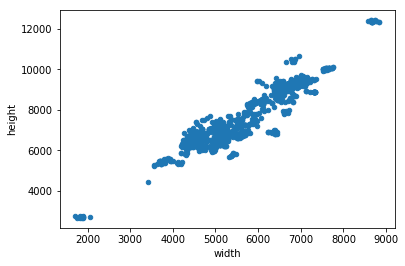

In [53]:
## Show image sizes

df.plot.scatter(x='width', y='height')

In [95]:
## Download image corresponding to each unique image hash,

# download helper function
def url_to_cvimage(url):
    r = requests.get(url)
    img_arr = np.asarray(bytearray(r.content), dtype='uint8')
    img = cv2.imdecode(img_arr, cv2.IMREAD_GRAYSCALE)
    return img

# def download_from_url(url, path):
#     r = requests.get(url, stream=True)
#     with open(path, 'wb') as f:
#         for chunk in r.iter_content(2048):
#             if chunk:
#                 f.write(chunk)

for i, row in tqdm(df.iterrows()):
    img_url = row['location_standard']
    img_url_hash = row['img_url_hash']
    img_path = f"{images_root}{row['img_url_hash']}.jpg"
    img_scale = 2048 / max(row['width'], row['height']) # scale factor for max image dimension of 2048
    if not os.path.exists(img_path):
        img = url_to_cvimage(img_url)
        if img_scale < 1:
            img = cv2.resize(img, (0,0), fx=img_scale, fy=img_scale, interpolation=cv2.INTER_AREA)
        print(f'Saving {img_path}')
        cv2.imwrite(img_path, img, [int(cv2.IMWRITE_JPEG_QUALITY), 90])



In [96]:
img_count = len(glob(f'{images_root}*.jpg'))
print(f'{img_count} images')

1263 images
